In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# for benchmarks

# on 18000 frame episodes, average of 10 episodes
soloRandomScores = {
     'Alien-v0': 164.0,'Asteroids-v0': 815.0,'Atlantis-v0': 21100.0,'BankHeist-v0': 17.0,
     'BattleZone-v0': 3300.0,'Bowling-v0': 20.2,'Boxing-v0': 2.4,'Centipede-v0': 2229.7,
     'ChopperCommand-v0': 660.0,'DoubleDunk-v0': -19.2,'FishingDerby-v0': -92.2,
     'Freeway-v0': 0.0,'Frostbite-v0': 53.0,'Gravitar-v0': 310.0,'Hero-v0': 1217.5,
     'IceHockey-v0': -10.9,'Jamesbond-v0': 25.0,'Kangaroo-v0': 60.0,'Krull-v0': 1479.8,
     'KungFuMaster-v0': 760.0,'MsPacman-v0': 246.0,'PrivateEye-v0': 40.0,
     'RoadRunner-v0': 20.0, 'Skiing-v0': -16270.7, 'Tennis-v0': -24.0,'TimePilot-v0': 3190.0,
     'UpNDown-v0': 422.0,'Venture-v0': 0.0,'WizardOfWor-v0': 750.0,'Zaxxon-v0': 0.0}

soloTpgScores = {
     'Alien-v0': 3382.7,'Asteroids-v0': 3050.7,'Atlantis-v0': 89653,'BankHeist-v0': 1051,
     'BattleZone-v0': 47233.4,'Bowling-v0': 223.7,'Boxing-v0': 76.5,'Centipede-v0': 34731.7,
     'ChopperCommand-v0': 7070,'DoubleDunk-v0': 2,'FishingDerby-v0': 49,
     'Freeway-v0': 28.9,'Frostbite-v0': 8144.4,'Gravitar-v0': 786.7,'Hero-v0': 16545.4,
     'IceHockey-v0': 10,'Jamesbond-v0': 3120,'Kangaroo-v0': 14780,'Krull-v0': 12850.4,
     'KungFuMaster-v0': 43353.4,'MsPacman-v0': 5156,'PrivateEye-v0': 15028.3,
     'RoadRunner-v0': 17410, 'Skiing-v0': 0, 'Tennis-v0': 1,'TimePilot-v0': 13540,
     'RoadRunner-v0': 17410,'Tennis-v0': 0,'TimePilot-v0': 13540,
     'UpNDown-v0': 34416,'Venture-v0': 576.7,'WizardOfWor-v0': 5196.7,'Zaxxon-v0': 6233.4}

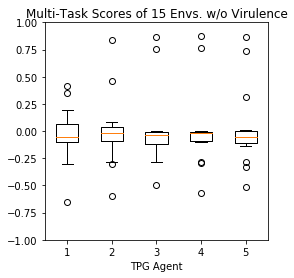

In [34]:
df = pd.read_csv('15-shrink-novir.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==300]

df.head()

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(4,19):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())


plt.figure(figsize=(4,4))
plt.boxplot(scoreDists)
plt.ylim(-1,1)
plt.title('Multi-Task Scores of 15 Envs. w/o Virulence')
plt.xlabel('TPG Agent')
#plt.ylabel('Score')
plt.show()

In [35]:
agentsScores = []
for i in range(len(df)):
    print('Agent #' + str(i+1) + ':')
    agentsScores.append([])
    for j in range(4,19):
        agentsScores[-1].append((str(df.columns[j][5:]), 
                (df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
                (soloTpgScores[df.columns[j][5:]] - soloRandomScores[df.columns[j][5:]])))
        print(agentsScores[-1][-1][0] + ': ' + str(df.iloc[i,j]) + ' : ' + str(agentsScores[-1][-1][1]))
        
    print('\nSorted:')
    agentsScores[-1].sort(key=lambda x: x[1], reverse=True)
    for score in agentsScores[-1]:
        print(score[0] + ': ' + str(score[1]))
    print('\n')
    
for scores in agentsScores:
    print(sum([score[1] for score in scores])/len(scores))

Agent #1:
Alien-v0: 3.333333333333333 : -0.049916633009185904
Asteroids-v0: 145.33333333333334 : -0.29953333035141866
Atlantis-v0: 1500.0 : -0.2859101716919756
BankHeist-v0: 5.666666666666668 : -0.01096067053513862
BattleZone-v0: 11900.0 : 0.1957508410457647
Bowling-v0: 0.0 : -0.09926289926289926
Boxing-v0: -1.7333333333333334 : -0.05578047683310841
Centipede-v0: 6040.966666666666 : 0.11726252743420919
ChopperCommand-v0: 6.666666666666668 : -0.10192407696307854
DoubleDunk-v0: -11.733333333333333 : 0.35220125786163525
FishingDerby-v0: -97.73333333333332 : -0.03918791312559007
Freeway-v0: 12.066666666666665 : 0.41753171856978083
Frostbite-v0: 165.33333333333334 : 0.0138830527885574
Gravitar-v0: 0.0 : -0.6503041745332494
Hero-v0: 132.5 : -0.07078595241357263

Sorted:
Freeway-v0: 0.41753171856978083
DoubleDunk-v0: 0.35220125786163525
BattleZone-v0: 0.1957508410457647
Centipede-v0: 0.11726252743420919
Frostbite-v0: 0.0138830527885574
BankHeist-v0: -0.01096067053513862
FishingDerby-v0: -0.03

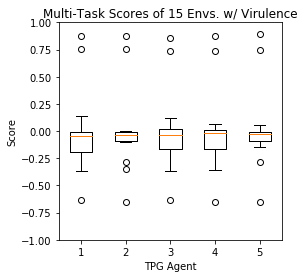

In [39]:
df = pd.read_csv('15-shrink-vir.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==300]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(4,19):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.figure(figsize=(4,4))
plt.boxplot(scoreDists)
plt.ylim(-1,1)
plt.title('Multi-Task Scores of 15 Envs. w/ Virulence')
plt.xlabel('TPG Agent')
plt.ylabel('Score')
plt.show()

In [40]:
agentsScores = []
for i in range(len(df)):
    print('Agent #' + str(i+1) + ':')
    agentsScores.append([])
    for j in range(4,19):
        agentsScores[-1].append((str(df.columns[j][5:]), 
                (df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
                (soloTpgScores[df.columns[j][5:]] - soloRandomScores[df.columns[j][5:]])))
        print(agentsScores[-1][-1][0] + ': ' + str(df.iloc[i,j]) + ' : ' + str(agentsScores[-1][-1][1]))
        
    print('\nSorted:')
    agentsScores[-1].sort(key=lambda x: x[1], reverse=True)
    for score in agentsScores[-1]:
        print(score[0] + ': ' + str(score[1]))
    print('\n')
    
for scores in agentsScores:
    print(sum([score[1] for score in scores])/len(scores))

Agent #1:
Alien-v0: 3.0 : -0.05002019448845808
Asteroids-v0: 149.33333333333334 : -0.2977441815389662
Atlantis-v0: 1540.0 : -0.2853266815456654
BankHeist-v0: 0.3333333333333333 : -0.016118633139909737
BattleZone-v0: 2333.333333333333 : -0.022003001512896043
Bowling-v0: 0.06666666666666668 : -0.09893529893529893
Boxing-v0: -25.13333333333333 : -0.3715699505173189
Centipede-v0: 6837.966666666666 : 0.14178409533772282
ChopperCommand-v0: 500.0 : -0.0249609984399376
DoubleDunk-v0: -0.6666666666666666 : 0.8742138364779873
FishingDerby-v0: -99.0 : -0.04815864022662888
Freeway-v0: 21.86666666666667 : 0.7566320645905423
Frostbite-v0: 0.0 : -0.0065501643720493365
Gravitar-v0: 8.333333333333334 : -0.6328228795189147
Hero-v0: 0.0 : -0.0794303198742163

Sorted:
DoubleDunk-v0: 0.8742138364779873
Freeway-v0: 0.7566320645905423
Centipede-v0: 0.14178409533772282
Frostbite-v0: -0.0065501643720493365
BankHeist-v0: -0.016118633139909737
BattleZone-v0: -0.022003001512896043
ChopperCommand-v0: -0.0249609984

In [ ]:
dfv = pd.read_csv('15-shrink-vir.txt')
dfv = dfv[dfv.tpgGen==120]

df = pd.read_csv('15-shrink-novir.txt')
df = df[df.tpgGen==120]



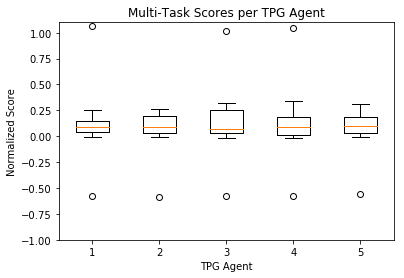

In [17]:
df = pd.read_csv('8-all-at-once.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==150]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(3,11):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.boxplot(scoreDists)
plt.ylim(-1,1.1)
plt.title('Multi-Task Scores per TPG Agent')
plt.xlabel('TPG Agent')
plt.ylabel('Normalized Score')
plt.show()

In [19]:
agentsScores = []
for i in range(len(df)):
    print('Agent #' + str(i+1) + ':')
    agentsScores.append([])
    for j in range(3,11):
        agentsScores[-1].append((str(df.columns[j][5:]), 
                (df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
                (soloTpgScores[df.columns[j][5:]] - soloRandomScores[df.columns[j][5:]])))
        print(agentsScores[-1][-1][0] + ': ' + str(agentsScores[-1][-1][1]))
        
    print('\nSorted:')
    agentsScores[-1].sort(key=lambda x: x[1], reverse=True)
    for score in agentsScores[-1]:
        print(score[0] + ': ' + str(score[1]))
    print('\n')

Agent #1:
Alien-v0: -0.00807779538323
Asteroids-v0: 1.06633269222
Atlantis-v0: 0.0830014733126
BankHeist-v0: 0.0628626692456
BattleZone-v0: 0.0978754205229
Bowling-v0: 0.253071253071
Boxing-v0: -0.580296896086
Centipede-v0: 0.106645744877

Sorted:
Asteroids-v0: 1.06633269222
Bowling-v0: 0.253071253071
Centipede-v0: 0.106645744877
BattleZone-v0: 0.0978754205229
Atlantis-v0: 0.0830014733126
BankHeist-v0: 0.0628626692456
Alien-v0: -0.00807779538323
Boxing-v0: -0.580296896086


Agent #2:
Alien-v0: -0.0074564265076
Asteroids-v0: 1.1490808248
Atlantis-v0: 0.0450746138025
BankHeist-v0: 0.0618955512573
BattleZone-v0: 0.170712942772
Bowling-v0: 0.258968058968
Boxing-v0: -0.588394062078
Centipede-v0: 0.114829856624

Sorted:
Asteroids-v0: 1.1490808248
Bowling-v0: 0.258968058968
BattleZone-v0: 0.170712942772
Centipede-v0: 0.114829856624
BankHeist-v0: 0.0618955512573
Atlantis-v0: 0.0450746138025
Alien-v0: -0.0074564265076
Boxing-v0: -0.588394062078


Agent #3:
Alien-v0: -0.0201944884581
Asteroids-v

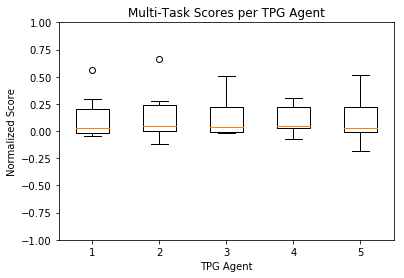

In [20]:
df = pd.read_csv('8-all-at-once-window-2.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==150]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(3,11):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.boxplot(scoreDists)
plt.ylim(-1,1)
plt.title('Multi-Task Scores per TPG Agent')
plt.xlabel('TPG Agent')
plt.ylabel('Normalized Score')
plt.show()

In [21]:
agentsScores = []
for i in range(len(df)):
    print('Agent #' + str(i+1) + ':')
    agentsScores.append([])
    for j in range(3,11):
        agentsScores[-1].append((str(df.columns[j][5:]), 
                (df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
                (soloTpgScores[df.columns[j][5:]] - soloRandomScores[df.columns[j][5:]])))
        print(agentsScores[-1][-1][0] + ': ' + str(agentsScores[-1][-1][1]))
        
    print('\nSorted:')
    agentsScores[-1].sort(key=lambda x: x[1], reverse=True)
    for score in agentsScores[-1]:
        print(score[0] + ': ' + str(score[1]))
    print('\n')

Agent #1:
Alien-v0: 0.0288936527169
Asteroids-v0: 0.559556291095
Atlantis-v0: -0.0439076335098
BankHeist-v0: -0.00773694390716
BattleZone-v0: 0.0273140708436
Bowling-v0: 0.296805896806
Boxing-v0: -0.0350877192982
Centipede-v0: 0.166045166451

Sorted:
Asteroids-v0: 0.559556291095
Bowling-v0: 0.296805896806
Centipede-v0: 0.166045166451
Alien-v0: 0.0288936527169
BattleZone-v0: 0.0273140708436
BankHeist-v0: -0.00773694390716
Boxing-v0: -0.0350877192982
Atlantis-v0: -0.0439076335098


Agent #2:
Alien-v0: 0.0282722838413
Asteroids-v0: 0.665563358232
Atlantis-v0: -0.117573264481
BankHeist-v0: 0.00773694390716
BattleZone-v0: 0.0591804868278
Bowling-v0: 0.276658476658
Boxing-v0: -0.0337381916329
Centipede-v0: 0.233696387915

Sorted:
Asteroids-v0: 0.665563358232
Bowling-v0: 0.276658476658
Centipede-v0: 0.233696387915
BattleZone-v0: 0.0591804868278
Alien-v0: 0.0282722838413
BankHeist-v0: 0.00773694390716
Boxing-v0: -0.0337381916329
Atlantis-v0: -0.117573264481


Agent #3:
Alien-v0: 0.032621865970

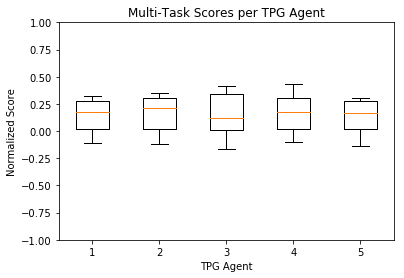

In [22]:
df = pd.read_csv('8-all-at-once-window-4.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==150]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(3,11):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.boxplot(scoreDists)
plt.ylim(-1,1)
plt.title('Multi-Task Scores per TPG Agent')
plt.xlabel('TPG Agent')
plt.ylabel('Normalized Score')
plt.show()

In [23]:
agentsScores = []
for i in range(len(df)):
    print('Agent #' + str(i+1) + ':')
    agentsScores.append([])
    for j in range(3,11):
        agentsScores[-1].append((str(df.columns[j][5:]), 
                (df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
                (soloTpgScores[df.columns[j][5:]] - soloRandomScores[df.columns[j][5:]])))
        print(agentsScores[-1][-1][0] + ': ' + str(agentsScores[-1][-1][1]))
        
    print('\nSorted:')
    agentsScores[-1].sort(key=lambda x: x[1], reverse=True)
    for score in agentsScores[-1]:
        print(score[0] + ': ' + str(score[1]))
    print('\n')

Agent #1:
Alien-v0: 0.0248547550253
Asteroids-v0: 0.321152211835
Atlantis-v0: 0.25615217423
BankHeist-v0: 0.0125725338491
BattleZone-v0: 0.268588363295
Bowling-v0: 0.303685503686
Boxing-v0: -0.113360323887
Centipede-v0: 0.0904252046028

Sorted:
Asteroids-v0: 0.321152211835
Bowling-v0: 0.303685503686
BattleZone-v0: 0.268588363295
Atlantis-v0: 0.25615217423
Centipede-v0: 0.0904252046028
Alien-v0: 0.0248547550253
BankHeist-v0: 0.0125725338491
Boxing-v0: -0.113360323887


Agent #2:
Alien-v0: 0.0248547550253
Asteroids-v0: 0.352462316053
Atlantis-v0: 0.258777879889
BankHeist-v0: 0.0193423597679
BattleZone-v0: 0.334597367834
Bowling-v0: 0.298771498771
Boxing-v0: -0.118758434548
Centipede-v0: 0.166232847209

Sorted:
Asteroids-v0: 0.352462316053
BattleZone-v0: 0.334597367834
Bowling-v0: 0.298771498771
Atlantis-v0: 0.258777879889
Centipede-v0: 0.166232847209
Alien-v0: 0.0248547550253
BankHeist-v0: 0.0193423597679
Boxing-v0: -0.118758434548


Agent #3:
Alien-v0: 0.0180196973934
Asteroids-v0: 0.41

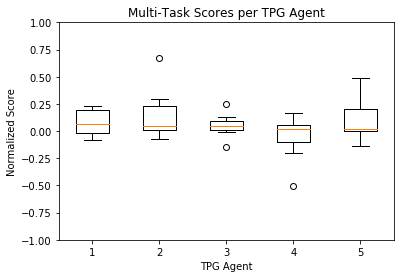

In [24]:
df = pd.read_csv('8-merge.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==100]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(3,11):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.boxplot(scoreDists)
plt.ylim(-1,1)
plt.title('Multi-Task Scores per TPG Agent')
plt.xlabel('TPG Agent')
plt.ylabel('Normalized Score')
plt.show()

In [25]:
agentsScores = []
for i in range(len(df)):
    print('Agent #' + str(i+1) + ':')
    agentsScores.append([])
    for j in range(3,11):
        agentsScores[-1].append((str(df.columns[j][5:]), 
                (df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
                (soloTpgScores[df.columns[j][5:]] - soloRandomScores[df.columns[j][5:]])))
        print(agentsScores[-1][-1][0] + ': ' + str(agentsScores[-1][-1][1]))
        
    print('\nSorted:')
    agentsScores[-1].sort(key=lambda x: x[1], reverse=True)
    for score in agentsScores[-1]:
        print(score[0] + ': ' + str(score[1]))
    print('\n')

Agent #1:
Alien-v0: -0.0105632708858
Asteroids-v0: -0.083195419779
Atlantis-v0: 0.190071915161
BankHeist-v0: 0.00290135396518
BattleZone-v0: 0.234445774741
Bowling-v0: 0.212776412776
Boxing-v0: -0.0499325236167
Centipede-v0: 0.124220047997

Sorted:
BattleZone-v0: 0.234445774741
Bowling-v0: 0.212776412776
Atlantis-v0: 0.190071915161
Centipede-v0: 0.124220047997
BankHeist-v0: 0.00290135396518
Alien-v0: -0.0105632708858
Boxing-v0: -0.0499325236167
Asteroids-v0: -0.083195419779


Agent #2:
Alien-v0: 0.0146021685774
Asteroids-v0: 0.673167240685
Atlantis-v0: 0.0558691815092
BankHeist-v0: -0.00676982591876
BattleZone-v0: 0.291350088998
Bowling-v0: 0.215233415233
Boxing-v0: -0.0701754385965
Centipede-v0: 0.0357608762538

Sorted:
Asteroids-v0: 0.673167240685
BattleZone-v0: 0.291350088998
Bowling-v0: 0.215233415233
Atlantis-v0: 0.0558691815092
Centipede-v0: 0.0357608762538
Alien-v0: 0.0146021685774
BankHeist-v0: -0.00676982591876
Boxing-v0: -0.0701754385965


Agent #3:
Alien-v0: 0.0602727809364


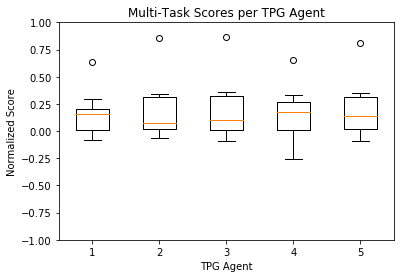

In [26]:
df = pd.read_csv('8-merge-window-4.txt')

# scores distributions normalized to random and solo tpg
df = df[df.tpgGen==150]

scoreDists = []
for i in range(len(df)):
    scoreDists.append([])
    for j in range(3,11):
        scoreDists[i].append(
            ((df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
             (soloTpgScores[df.columns[j][5:]] - 
                  soloRandomScores[df.columns[j][5:]])).tolist())
        
plt.boxplot(scoreDists)
plt.ylim(-1,1)
plt.title('Multi-Task Scores per TPG Agent')
plt.xlabel('TPG Agent')
plt.ylabel('Normalized Score')
plt.show()

In [27]:
agentsScores = []
for i in range(len(df)):
    print('Agent #' + str(i+1) + ':')
    agentsScores.append([])
    for j in range(3,11):
        agentsScores[-1].append((str(df.columns[j][5:]), 
                (df.iloc[i,j] - soloRandomScores[df.columns[j][5:]]) /
                (soloTpgScores[df.columns[j][5:]] - soloRandomScores[df.columns[j][5:]])))
        print(agentsScores[-1][-1][0] + ': ' + str(agentsScores[-1][-1][1]))
        
    print('\nSorted:')
    agentsScores[-1].sort(key=lambda x: x[1], reverse=True)
    for score in agentsScores[-1]:
        print(score[0] + ': ' + str(score[1]))
    print('\n')

Agent #1:
Alien-v0: 0.00714574206978
Asteroids-v0: 0.631122243593
Atlantis-v0: 0.158271702187
BankHeist-v0: 0.00870406189555
BattleZone-v0: 0.157055907351
Bowling-v0: 0.298771498771
Boxing-v0: -0.0782726045884
Centipede-v0: 0.170386437758

Sorted:
Asteroids-v0: 0.631122243593
Bowling-v0: 0.298771498771
Centipede-v0: 0.170386437758
Atlantis-v0: 0.158271702187
BattleZone-v0: 0.157055907351
BankHeist-v0: 0.00870406189555
Alien-v0: 0.00714574206978
Boxing-v0: -0.0782726045884


Agent #2:
Alien-v0: 0.0108739553236
Asteroids-v0: 0.860133291587
Atlantis-v0: 0.304144238764
BankHeist-v0: 0.0174081237911
BattleZone-v0: 0.0318664159842
Bowling-v0: 0.342506142506
Boxing-v0: -0.0634278002699
Centipede-v0: 0.124423112424

Sorted:
Asteroids-v0: 0.860133291587
Bowling-v0: 0.342506142506
Atlantis-v0: 0.304144238764
Centipede-v0: 0.124423112424
BattleZone-v0: 0.0318664159842
BankHeist-v0: 0.0174081237911
Alien-v0: 0.0108739553236
Boxing-v0: -0.0634278002699


Agent #3:
Alien-v0: 0.0136701152639
Asteroid